# **Prediction of Customer Churn**


Process for Machine Learning
- Write the steps in chat

1. problem statement
2. data acquisition
3. data exploration - find whether issues with data - null, duplicates, outliers
4. data handling - column removal - label encoding - train test split
5. model selection - choosing a model
6. model training - fit data into model
7. model testing - confusion matrix, report, F1 score
8. deployment

## Imports

In [27]:
import pandas as pd

# url = '''https:\\github.com\\treselle-systems\\customer_churn_analysis\\blob\\master\\WA_Fn-UseC_-Telco-Customer-Churn.csv'''
# df = pd.read_csv(url)

df = pd.read_csv("customerchurn.csv")

In [28]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
570,7293-LSCDV,Female,0,Yes,Yes,60,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.25,1103.25,No
916,3956-CJUST,Female,1,No,No,23,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.40,1643.55,No
3092,6032-IGALN,Female,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.1,Yes
1901,5777-ZPQNC,Female,0,No,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,20.15,260.7,No


## Data Exploration

- check for Null
- Outliers
- Duplicates
- Scale

In [29]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [30]:
# basic stats
df.info()


df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [31]:
# check for duplicates

duplicate_count = df.duplicated().sum()


# checking null values
null_count = df.isnull().sum()
null_count

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- For ML algorithms
    - std is similiar, scale of data is similar
    - Scaling in Data? 
    - 

### Data Handling

In [32]:
# Convert to numeric, invalid parsing will be set as NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where 'value' is NaN (non-numeric originally)
df = df.dropna(subset=['TotalCharges']) #, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### Drop columns
- Reducing the Dimensionality
- Removing noise from our Data
- **Total charges** = calculation based on **tenure**, and **monthly charges**
- `ID` is different for every record - no repeated pattern in this - add to `overfitting` - make our models memorizing parrots
- 
- Drop the columns that do not help in Identifying patterns

In [34]:
# Columns to Drop

# features that don't add too much value
# CustomerID 
cols_to_drop = ['customerID']

df = df.drop(columns=cols_to_drop, axis=1)

In [35]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


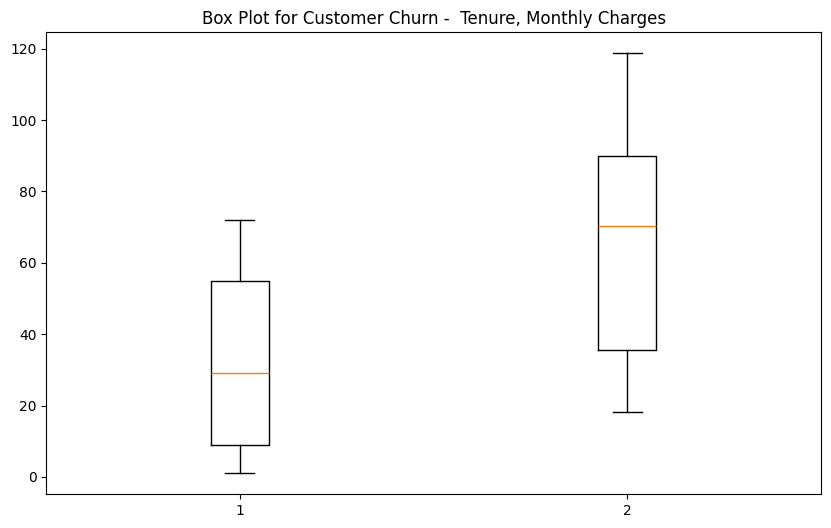

In [36]:
# Visualize and Check for Outliers
import matplotlib.pyplot as plt
import seaborn as sns

data = df[['tenure', 'MonthlyCharges']] #, 'TotalCharges']]


ax = plt.figure(figsize=(10, 6))

plt.boxplot(data)
plt.title('Box Plot for Customer Churn -  Tenure, Monthly Charges')

plt.show()

<Axes: >

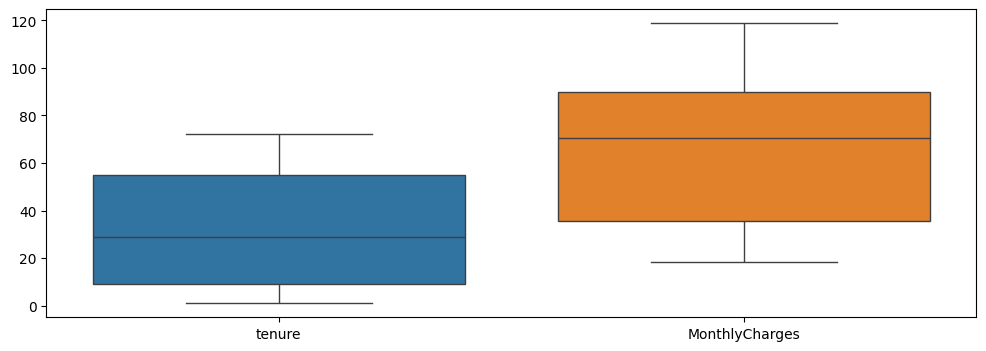

In [37]:
# Boxplots in Seaborn

plt.figure(figsize=(12,4))
sns.boxplot(data)

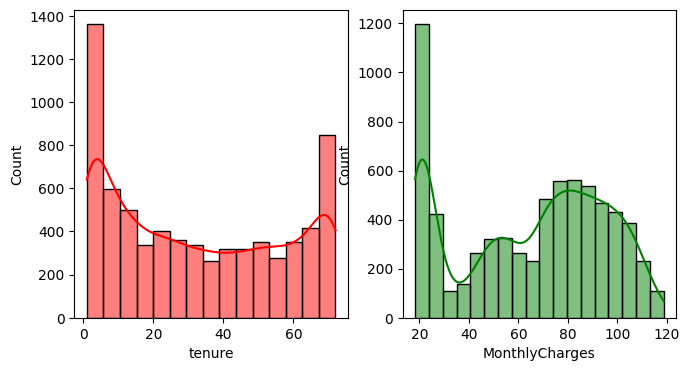

In [38]:
plt.figure(figsize=(12,4))
# plt.subplot(1,3,1)
# sns.histplot(df['TotalCharges'], kde=True, color='blue')
plt.subplot(1,3,2)
sns.histplot(df['tenure'], kde=True, color='red')
plt.subplot(1,3,3)
sns.histplot(df['MonthlyCharges'], kde=True, color='green')
plt.show()

When data was ready, encoding on the data
- because ML models are only able to process numeric data well

## Label Encoding
- we are preparing data for our ML pipeline
- Turn all the `object` type - text to numeric data

In [39]:
print(df['MultipleLines'].dtype) # 'O' # object - when we print

object


In [40]:
# Checking the type of columns
for col in df.columns:
    print(f'|{col:>18}|----------> |{df[col].dtype}|')

|            gender|----------> |object|
|     SeniorCitizen|----------> |int64|
|           Partner|----------> |object|
|        Dependents|----------> |object|
|            tenure|----------> |int64|
|      PhoneService|----------> |object|
|     MultipleLines|----------> |object|
|   InternetService|----------> |object|
|    OnlineSecurity|----------> |object|
|      OnlineBackup|----------> |object|
|  DeviceProtection|----------> |object|
|       TechSupport|----------> |object|
|       StreamingTV|----------> |object|
|   StreamingMovies|----------> |object|
|          Contract|----------> |object|
|  PaperlessBilling|----------> |object|
|     PaymentMethod|----------> |object|
|    MonthlyCharges|----------> |float64|
|      TotalCharges|----------> |float64|
|             Churn|----------> |object|


In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
# result - all the columns should be Label encoded

In [42]:
# Checking if the type of columns has changed yet or not
for col in df.columns:
    print(f'|{col:>18}----------> |{df[col].dtype}|')

|            gender----------> |int64|
|     SeniorCitizen----------> |int64|
|           Partner----------> |int64|
|        Dependents----------> |int64|
|            tenure----------> |int64|
|      PhoneService----------> |int64|
|     MultipleLines----------> |int64|
|   InternetService----------> |int64|
|    OnlineSecurity----------> |int64|
|      OnlineBackup----------> |int64|
|  DeviceProtection----------> |int64|
|       TechSupport----------> |int64|
|       StreamingTV----------> |int64|
|   StreamingMovies----------> |int64|
|          Contract----------> |int64|
|  PaperlessBilling----------> |int64|
|     PaymentMethod----------> |int64|
|    MonthlyCharges----------> |float64|
|      TotalCharges----------> |float64|
|             Churn----------> |int64|


Our data is ready for the mode

### Modeling Part
- We can use multiple models for our benefit
- Check how different models are performing and choose a model for our final predictions

- Models to test:
    1. Logistic Regression
    2. Decision Trees
    3. Ensemble Models:
        - Random Forest
        - XG Boost 

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier


# Logistic Regression Model
log_model = LogisticRegression()

# Decision Tree Model
dec_model = DecisionTreeClassifier()

# Random Forest
rf_model = RandomForestClassifier()

# XG Boost
xgb_model = XGBClassifier()

> #### Hyper Parameter Setting
- changing the parameters of the model, to control how the model performs
- Tuning - where you find the most optimized parameters - that lead to the best performance

In [44]:
# Logistic Regression Model
log_model = LogisticRegression(
    class_weight= 'balanced',
    penalty= 'l2', # prevent overfitting
    C= 0.1, # strenght of regularization
    solver='liblinear', # optimization
    max_iter = 1000 # number of training iterations the model with do

)

# Decision Tree Model
dec_model = DecisionTreeClassifier(
    criterion = 'gini', # gini entropy log-loss
    random_state = 42,
    max_depth = 5  # Tree Pruning - setting up a height of the tree -- if too much, model overfits
)

# Ensemble Methods
# Random Forest
rf_model = RandomForestClassifier(
    max_features = 'sqrt', # number of features go into every tree # study on your own
    random_state= 42,
    max_depth = 10,
    class_weight= 'balanced_subsample',
    n_estimators = 200 # nubmer of Decision Trees
)

# XG Boost
xgb_model = XGBClassifier(
    n_estimators = 300,
    learning_rate = 0.01, 
    max_depth = 4,
    subsample = 0.8, # use only 80% of data for each step 
    random_state=42
)

### Now that the models are in a better more optimized state, let's train

### 3rd Performance Improvement Iteration
- #### Hyper Parameter Tuning
    - Employ GridSearch to see which parameters are the best for the models

### --------- Models are Optimized ------

### Training Step

- Train test split
- Fit data into every model
- Create predictions for every model

In [45]:
from sklearn.model_selection import train_test_split

# X will store the information ----- input values
# y will store the ----------target variable---- OUTPUT
# AXIS = 0 -------- ACROSS        AXIS = 1 Means ---------- DOWN
# axis=0 operates along rows (vertical),    while axis=1 operates along columns
X = df.drop('Churn', axis = 1)

y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

print(f"X-train: {X_train.shape} y-Train: {y_train.shape}---||---X-test: {X_test.shape} y-test: {y_test.shape}")

X-train: (5625, 19) y-Train: (5625,)---||---X-test: (1407, 19) y-test: (1407,)


### 1st Performance Improvement Iteration
- #### Data Scaling
    - Let's scale the training data, so that if there are any features beign favoured becuase of magnitude only, that bias is removed

In [46]:
from sklearn.preprocessing import StandardScaler

# create scaler object
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### --------- Data is Scaled ------

### 2nd Performance Improvement Iteration
- #### Class balance
    - Check class imbalance
    - Techniques to fix the class balance

- in clasification report Support :

- Class 0 - 374
- Class 1 - 1407


We can use SMOTE for this
- A technique that helps us fix this class imbalance

In [47]:
# pip install imblearn

In [48]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

### --------- Data Classes are Balanced ------

### Model Training

In [49]:
# Fitting data into models
# Make predictions as well

# 1. Logistic Regression
log_model.fit(X_res,y_res)
y_pred_logmodel = log_model.predict(X_test_scaled)

# 2. Decision Tree Model
dec_model.fit(X_res,y_res)
y_pred_decisiontree = dec_model.predict(X_test_scaled)

# 3. Random Forest
rf_model.fit(X_res,y_res)
y_pred_randomforest = rf_model.predict(X_test_scaled)

# 4. XG Boost
xgb_model.fit(X_res,y_res)
y_pred_xgboost = xgb_model.predict(X_test_scaled)

### Testing

- Compare the performances
- We use F1 Score to check the overall performance of the model
- 
- If performance is Satisfatory:
    - Choose the model that works best
- else:
    - go back to previous steps:
        - change hyperparameters
        - look into data, Data scaling



In [50]:
# testing ---------- F1 - Score

from sklearn.metrics import f1_score, classification_report

# 1. Logistic Regression
logmodel_f1score = f1_score(y_test, y_pred_logmodel)
logmodel_cr = classification_report(y_test, y_pred_logmodel)

# 2. Decision Tree Model
decisiontree_f1score = f1_score(y_test, y_pred_decisiontree)
decisiontree_cr = classification_report(y_test, y_pred_decisiontree)

# 3. Random Forest
randomforest_f1score = f1_score(y_test, y_pred_randomforest)
randomforest_cr = classification_report(y_test, y_pred_randomforest)

# 4. XG Boost
xgboost_f1score = f1_score(y_test, y_pred_xgboost)
xgboost_cr = classification_report(y_test, y_pred_xgboost)

In [51]:
# Print out the F1 scores

# 1. Logistic Regression
print(f"Logistic Regression F1 Score: {logmodel_f1score:>20}")

# 2. Decision Tree Model
print(f"Decision Tree F1 Score: {decisiontree_f1score:>26}")

# 3. Random Forest
print(f"Random Forest F1 Score: {randomforest_f1score:>26}")

# 4. XG Boost
print(f"XG Boost F1 Score: {xgboost_f1score:>31}")

Logistic Regression F1 Score:   0.6190476190476191
Decision Tree F1 Score:         0.5688073394495413
Random Forest F1 Score:          0.602020202020202
XG Boost F1 Score:              0.5709372312983663


In [52]:
# Print out the scores

# 1. Logistic Regression
print("--------------------Logistic Regression----------------------")
print(f"Classification Report: \n", logmodel_cr)

print("-----------------------Decision Tree------------------------")
# 2. Decision Tree Model
print(f"Classification Report: \n", decisiontree_cr)

print("--------------------Random Forest--------------------------")
# 3. Random Forest
print(f"Classification Report: \n", randomforest_cr)

print("---------------------XG Boost----------------------------")
# 4. XG Boost
print(f"Classification Report: \n", xgboost_cr)

--------------------Logistic Regression----------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407

-----------------------Decision Tree------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.61      0.73      1033
           1       0.43      0.83      0.57       374

    accuracy                           0.67      1407
   macro avg       0.67      0.72      0.65      1407
weighted avg       0.78      0.67      0.69      1407

--------------------Random Forest--------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.69

---

---

## Deployement

- `Random Forest Model` came out with the best performance so we choose that model
- 

`Take this model ---->  User Interface to give input -----> Show output`

- A lot of ways to deploy your models
    - deploy models over cloud platforms:
        - AWS, Azure, GCP, IntelDevCloud
        - create a UI, create a model file, host everything on a server
        - Streamlit, Huggingface, GitHub pages

### **Gradio** ----
- Gradio, UI library is lightweight
- Notebook Based ---- outputs right here too


In [54]:
# pip install gradio

In [57]:
import gradio as gr
import numpy as np

### Learn Gradio

In [64]:
def greet(name):
    return f'HELLO! Idrees says, {name} is AWESOME!!!'

# 
demo = gr.Interface(
    fn= greet,
    inputs= 'text' ,
    outputs= 'text'
)

demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7874
* Running on public URL: https://44047578920c84471a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [68]:
# Exercise 2
def greet(name, num):
    return f'Your name is: {name}, This is your favourite Number: {num}!!!'

# 
demo = gr.Interface(
    fn= greet,
    inputs= [
        gr.Textbox(label= "Please enter your name"),
        gr.Number(label="Favourite Number")

    ],
    outputs = gr.Textbox(label="Here is the Output"),
    title = "First Application",
    description = "We are just having fun here"
)

demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7878
* Running on public URL: https://86e60ed6c0bc480a88.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### Streamlit ----
- ML engineers use Streamlit


---

#### Try this Kaggle Challenge 
- Predicting Diabetes [Link](https://www.kaggle.com/competitions/playground-series-s5e12/data)